# Heart Failure Prediction using Machine Learning
We look into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has chance of heart disease based on their medical attributes.

## Problem Definition
Given clinical parameters about a patient, can we predict whether or not person is at risk of heart failure

## Data
Data is taken from Kaggle.

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Features
Information about the acquired data

**Data Dictionary**
* Age - Age in years
* Sex - Female or Male
* ChestPainType - 4 types (Typical angina, Atypical angina, Non-anginal pain, Asymptomatic)
* RestingBP - Resting Blood Pressure in mm Hg
* Cholesterol - serum cholestoral in mg/dL
* FastingBS - Fasting blood sugar (1 if >126 mg/dL else 0)
* RestingECG - Resting electrocardiographic results
* MaxHR - Maximum Heart Rate achieved
* ExerciseAngina - Exercise induced angina (1 for yes else 0)
* Oldpeak - ST depression induced by exercise relative to rest
* ST_Slope - The slope of the peak exercise ST segment
* HeartDisease - Have heart disease or not (1 for yes, 0 for no)

## Imports

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
# %plotly inline

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay 

## Load Data

In [194]:
df = pd.read_csv("heart.csv")
df.shape

(918, 12)

In [195]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Data Preprocessing

### Label Encoding

In [196]:
le = LabelEncoder()
df["ChestPainType"] = le.fit_transform(df["ChestPainType"])
df["RestingECG"] = le.fit_transform(df["RestingECG"])
df["ExerciseAngina"] = le.fit_transform(df["ExerciseAngina"])
df["ST_Slope"] = le.fit_transform(df["ST_Slope"])
df["Sex"] = le.fit_transform(df["Sex"])

## Data Exploration (EDA)

In [197]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [198]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


In [199]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

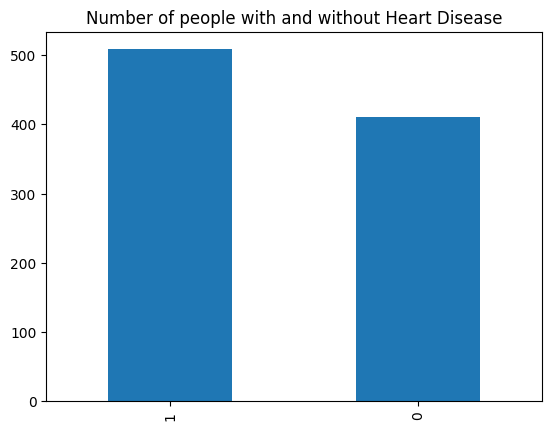

In [200]:
df["HeartDisease"].value_counts().plot(kind="bar")
plt.title("Number of people with and without Heart Disease");

In [201]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [202]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


### Age distribution in data


In [203]:
fig=px.histogram(df, x="HeartDisease", color="Sex", hover_data=df.columns, title="Distribution of Heart Diseases", barmode="group")
fig.show()

### Heart Disease in function of Age and Max Heart Rate

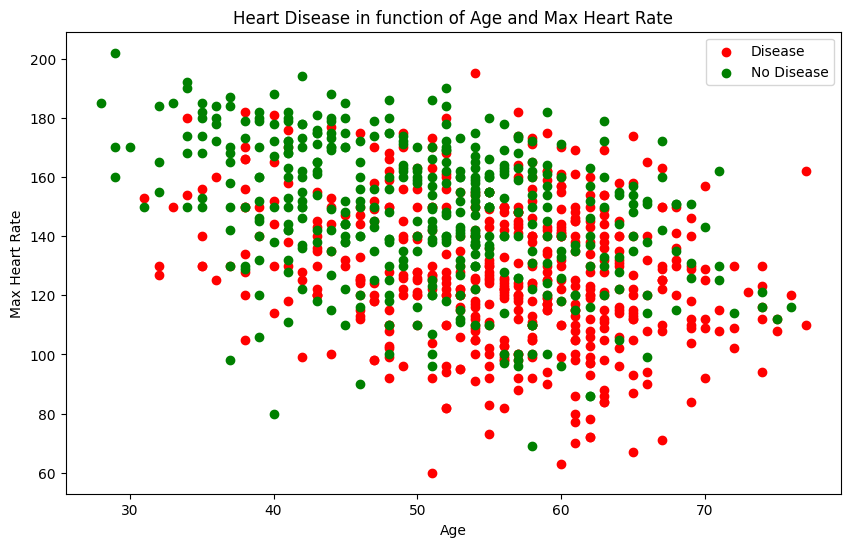

In [204]:
plt.figure(figsize=(10, 6))

# positive examples
plt.scatter(df.Age[df.HeartDisease == 1], df.MaxHR[df.HeartDisease == 1], color="red")

# negative examples
plt.scatter(df.Age[df.HeartDisease == 0], df.MaxHR[df.HeartDisease == 0], color="green")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

### Correlation Matrix

In [205]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

## Data Modeling

In [206]:
df = df.drop_duplicates()
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [207]:
x = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [208]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [210]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((734, 11), (184, 11), (734,), (184,))

## Learning

In [211]:
models = {"NB": GaussianNB(), 
          "MLP": MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000),
          "SVM": SVC(kernel="sigmoid")}

### Naive Bayes

In [212]:
naive_bayes = models["NB"]
naive_bayes.fit(x_train, y_train)
naive_bayes_pred = naive_bayes.predict(x_test)
print(classification_report(y_test, naive_bayes_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



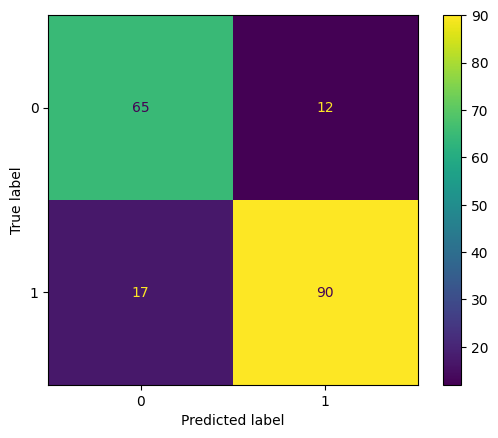

In [213]:
cm = confusion_matrix(y_test, naive_bayes_pred)
ConfusionMatrixDisplay(cm).plot();

### MLP Classifier

In [214]:
mlp_classifier = models["MLP"]
mlp_classifier.fit(x_train, y_train)
mlp_classifier_pred = mlp_classifier.predict(x_test)
print(classification_report(y_test, mlp_classifier_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        77
           1       0.93      0.81      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



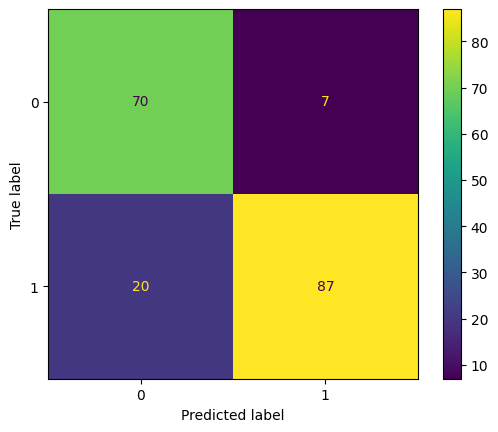

In [215]:
cm = confusion_matrix(y_test, mlp_classifier_pred)
ConfusionMatrixDisplay(cm).plot();

### SVM

In [216]:
svm_classifier = models["SVM"]
svm_classifier.fit(x_train, y_train)
svm_classifier_pred = svm_classifier.predict(x_test)
print(classification_report(y_test, svm_classifier_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80        77
           1       0.88      0.79      0.83       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



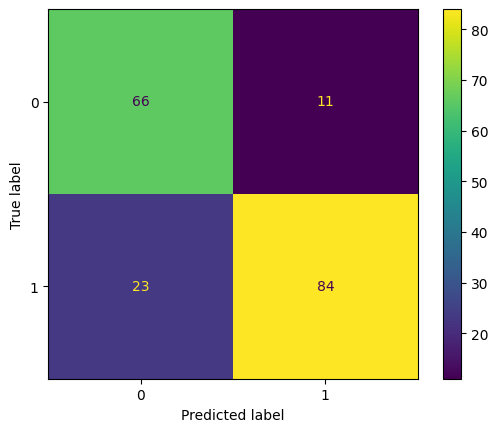

In [217]:
cm = confusion_matrix(y_test, svm_classifier_pred)
ConfusionMatrixDisplay(cm).plot();

### Comparison

In [218]:
naive_bayes_accuracy = naive_bayes.score(x_test, y_test)
naive_bayes_f1 = classification_report(y_test, naive_bayes_pred, output_dict=True)["weighted avg"]["f1-score"]
naive_bayes_recall = classification_report(y_test, naive_bayes_pred, output_dict=True)["weighted avg"]["recall"]
naive_bayes_precision = classification_report(y_test, naive_bayes_pred, output_dict=True)["weighted avg"]["precision"]

mlp_classifier_accuracy = mlp_classifier.score(x_test, y_test)
mlp_classifier_f1 = classification_report(y_test, mlp_classifier_pred, output_dict=True)["weighted avg"]["f1-score"]
mlp_classifier_recall = classification_report(y_test, mlp_classifier_pred, output_dict=True)["weighted avg"]["recall"]
mlp_classifier_precision = classification_report(y_test, mlp_classifier_pred, output_dict=True)["weighted avg"]["precision"]

svm_classifier_accuracy = svm_classifier.score(x_test, y_test)
svm_classifier_f1 = classification_report(y_test, svm_classifier_pred, output_dict=True)["weighted avg"]["f1-score"]
svm_classifier_recall = classification_report(y_test, svm_classifier_pred, output_dict=True)["weighted avg"]["recall"]
svm_classifier_precision = classification_report(y_test, svm_classifier_pred, output_dict=True)["weighted avg"]["precision"]

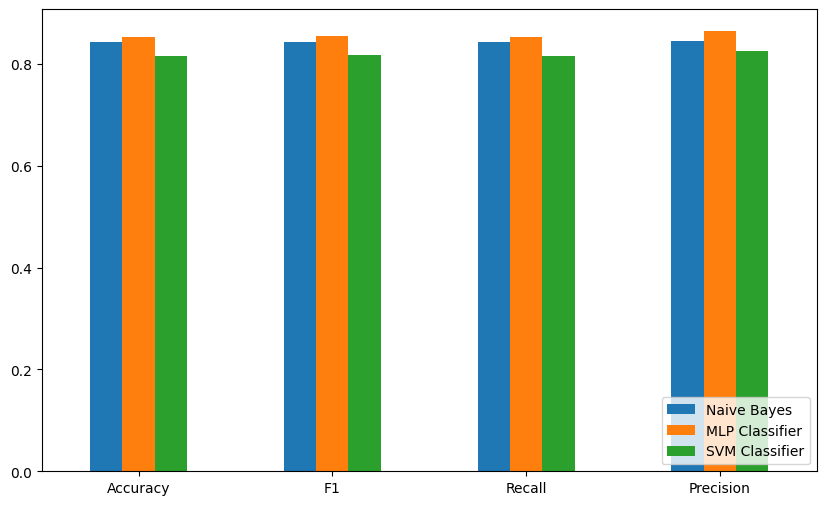

In [219]:
y_naive_bayes = [naive_bayes_accuracy, naive_bayes_f1, naive_bayes_recall, naive_bayes_precision]
y_mlp_classifier = [mlp_classifier_accuracy, mlp_classifier_f1, mlp_classifier_recall, mlp_classifier_precision]
y_svm_classifier = [svm_classifier_accuracy, svm_classifier_f1, svm_classifier_recall, svm_classifier_precision]

index = ['Accuracy', 'F1', 'Recall', 'Precision']
df2 = pd.DataFrame({'Naive Bayes': y_naive_bayes, 'MLP Classifier': y_mlp_classifier, 'SVM Classifier': y_svm_classifier}, index=index)
ax = df2.plot.bar(rot=0, figsize=(10, 6))
plt.legend(loc='lower right')
plt.show();

## Conclusion

On the given problem, MLP classifier works the best, followed by Naive Bayes model. SVM does not perform according to expectations.